# i. Perkenalan

**FINAL PROJECT**

**Nama Kelompok:**
- Kelvin Rizky Novsa
- M Hafiz Juliant
- Nailina Farah
- Raden Rian Girianom

**Latar Belakang:**
Prediksi harga real estate menjadi hal krusial dalam industri properti, baik bagi pembeli maupun penjual. Namun, akses terhadap informasi valuasi properti yang akurat seringkali terbatas, menyebabkan ketidakpastian dan potensi kerugian finansial, terutama di daerah California, Amerika Serikat.

**Problem Statement:**
Dalam menghadapi tantangan ini, kami berkomitmen untuk menciptakan sebuah model prediksi harga rumah dengan tingkat akurasi minimal 80%. Model ini dirancang untuk memberikan akses yang mudah dan dapat diandalkan bagi pemilik rumah yang ingin menjual properti, dengan tujuan mengurangi ketidakpastian dan risiko finansial yang terkait dengan penentuan harga di daerah California, Amerika Serikat.

**Solusi:**
Untuk mengatasi keterbatasan akses informasi valuasi properti, kami merancang sebuah platform berbasis AI yang menggunakan algoritma machine learning. Platform ini mampu menganalisis berbagai faktor valuasi properti, termasuk ukuran, fasilitas, dan gambar properti yang diunggah oleh pengguna. Dengan memanfaatkan analisis gambar dan informasi yang diberikan oleh pengguna, platform ini memberikan estimasi nilai properti secara transparan. Rekomendasi harga yang disesuaikan dengan kondisi pasar saat ini akan disediakan, memberikan pemilik rumah panduan yang tepat untuk menentukan harga properti mereka.

# ii. Import Libraries


In [ ]:
# Import Libraries
import os
import cv2
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate, Activation, Dropout, BatchNormalization, concatenate
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle
from sklearn.metrics import r2_score, mean_squared_error
import warnings
!pip install -q phik
import phik
warnings.filterwarnings('ignore')
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.applications import VGG16

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.7 MB/s eta 0:00:00


# iii. Data Loading

In [ ]:
# menginstall kaggle
!pip install -q kaggle

# memberikan token yang didapatkan dari kaggle
token = '{"username":"nailinafarah","key":"8df9c00106f0393a0a190087d3270955"}'

with open("kaggle.json", "w") as f:
  f.write(token)

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download dataset yang akan kami gunakan menggunakan link
!kaggle datasets download -d "ted8080/house-prices-and-images-socal"

100% 368M/369M [00:17<00:00, 23.8MB/s]
100% 369M/369M [00:17<00:00, 22.4MB/s]


In [ ]:
# melakukan unzip dataset
!unzip /content/house-prices-and-images-socal.zip

Streaming output truncated to the last 5000 lines.
  inflating: socal2/socal_pics/5499.jpg  
  inflating: socal2/socal_pics/55.jpg  
  inflating: socal2/socal_pics/550.jpg  
  inflating: socal2/socal_pics/5500.jpg  
  inflating: socal2/socal_pics/5501.jpg  
  inflating: socal2/socal_pics/5502.jpg  
  inflating: socal2/socal_pics/5503.jpg  
  inflating: socal2/socal_pics/5504.jpg  
  inflating: socal2/socal_pics/5505.jpg  
  inflating: socal2/socal_pics/5506.jpg  
  inflating: socal2/socal_pics/5507.jpg  
  inflating: socal2/socal_pics/5508.jpg  
  inflating: socal2/socal_pics/5509.jpg  
  inflating: socal2/socal_pics/551.jpg  
  inflating: socal2/socal_pics/5510.jpg  
  inflating: socal2/socal_pics/5511.jpg  
  inflating: socal2/socal_pics/5512.jpg  
  inflating: socal2/socal_pics/5513.jpg  
  inflating: socal2/socal_pics/5514.jpg  
  inflating: socal2/socal_pics/5515.jpg  
  inflating: socal2/socal_pics/5516.jpg  
  inflating: socal2/socal_pics/5517.jpg  
  inflating: socal2/socal_pic

In [ ]:
# loading data dari kaggle
df = pd.read_csv("socal2.csv")

df

image_id                     street               citi  n_citi  bed  \
0             0      1317 Van Buren Avenue    Salton City, CA     317    3   
1             1             124 C Street W        Brawley, CA      48    3   
2             2            2304 Clark Road       Imperial, CA     152    3   
3             3         755 Brawley Avenue        Brawley, CA      48    3   
4             4      2207 R Carrillo Court       Calexico, CA      55    4   
...         ...                        ...                ...     ...  ...   
15469     15469    4156 Sterlingview Drive       Moorpark, CA     227    5   
15470     15470         4355 Avenida Prado  Thousand Oaks, CA     372    5   
15471     15471  12717 Koenigstein Rd Road    Santa Paula, CA     338    3   
15472     15472           36 Kunkle Street       Oak View, CA     253    4   
15473     15473        4562 Eastbourne Bay         Oxnard, CA     261    2   

       bath  sqft   price  
0       2.0  1560  201900  
1       2.0   713  228500  
2       1.0   800  273950  
3       1.0  1082  350000  
4       3.0  2547  385100  
...     ...   ...     ...  
15469   4.1  4092  949000  
15470   3.0  2773  949900  
15471   2.0  1576  920000  
15472   2.0  2086  997000  
15473   2.0  1216  975000  

[15474 rows x 8 columns]

Dataset kami terdiri dari 15474 baris dan 8 kolom

In [ ]:
# informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   street    15474 non-null  object 
 2   citi      15474 non-null  object 
 3   n_citi    15474 non-null  int64  
 4   bed       15474 non-null  int64  
 5   bath      15474 non-null  float64
 6   sqft      15474 non-null  int64  
 7   price     15474 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 967.2+ KB


8 kolom dataset merupakan 1 float, 5 integer, dan 2 object

In [ ]:
# melihat unique value dari kolom 'citi'
df['citi'].unique()

array(['Salton City, CA', 'Brawley, CA', 'Imperial, CA', 'Calexico, CA',
       'Gorman, CA', 'Frazier Park, CA', 'Rosamond, CA', 'Kernville, CA',
       'Tehachapi, CA', 'Arvin, CA', 'California City, CA',
       'Bakersfield, CA', 'Delano, CA', 'Lebec, CA',
       'Pine Mountain Club, CA', 'Inyokern, CA', 'Mojave, CA',
       'Boron, CA', 'Stallion Springs, CA', 'Ridgecrest, CA', 'Keene, CA',
       'Caliente, CA', 'Bear Valley Springs, CA', 'Wofford Heights, CA',
       'Studio City, CA', 'Glendale, CA', 'Eagle Rock, CA',
       'Rancho Palos Verdes, CA', 'Woodland Hills, CA', 'Montebello, CA',
       'Los Angeles, CA', 'Culver City, CA', 'Long Beach, CA',
       'Walnut, CA', 'Rowland Heights, CA', 'Porter Ranch, CA',
       'Newhall, CA', 'Covina, CA', 'Santa Monica, CA', 'San Marino, CA',
       'Agoura Hills, CA', 'Stevenson Ranch, CA',
       'La Canada Flintridge, CA', 'Arcadia, CA', 'Pasadena, CA',
       'El Segundo, CA', 'El Monte, CA', 'Torrance, CA', 'Altadena, CA',
     

In [ ]:
# melihat jumlah value unique dari kolom 'citi'
df['citi'].nunique()

415

Dari feature 'citi' terdapat 415 unique value. Namun pada value tersebut ada kesamaan semua yaitu terdapat CA sehingga akan kami hilangkan.

In [ ]:
# Hapus nama CA di kolom citi
df['citi'] = df['citi'].str.replace(', CA', '')

In [ ]:
# mengubah datatype untuk kolom bath dari float ke integer
df['bath'] = df['bath'].astype('int64')

Karena kolom bath yang menjelaskan jumlah kamar mandi bertipe float, maka kami akan mengubah menjadi tipe integer agar jumlahnya merupakan bilangan bulat.

In [ ]:
# melihat informasi dataset setelah diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  15474 non-null  int64 
 1   street    15474 non-null  object
 2   citi      15474 non-null  object
 3   n_citi    15474 non-null  int64 
 4   bed       15474 non-null  int64 
 5   bath      15474 non-null  int64 
 6   sqft      15474 non-null  int64 
 7   price     15474 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 967.2+ KB


Berikut ini adalah tipe kolom setelah diubah menjadi 6 integer dan 2 object.

In [ ]:
# melihat distribusi kolom numerik dari dataset
df.describe()

image_id        n_citi           bed          bath          sqft  \
count  15474.000000  15474.000000  15474.000000  15474.000000  15474.000000   
mean    7736.500000    216.597518      3.506398      2.422063   2173.913209   
std     4467.103368    112.372985      1.034838      0.951160   1025.339617   
min        0.000000      0.000000      1.000000      0.000000    280.000000   
25%     3868.250000    119.000000      3.000000      2.000000   1426.000000   
50%     7736.500000    222.500000      3.000000      2.000000   1951.000000   
75%    11604.750000    315.000000      4.000000      3.000000   2737.750000   
max    15473.000000    414.000000     12.000000     36.000000  17667.000000   

              price  
count  1.547400e+04  
mean   7.031209e+05  
std    3.769762e+05  
min    1.950000e+05  
25%    4.450000e+05  
50%    6.390000e+05  
75%    8.349750e+05  
max    2.000000e+06

Berikut adalah deskripsi dari feature numerik yang berada dalam dataset.

# iv. Exploratory Data Analysis (EDA)

In [ ]:
df_eda = df.copy()

In [ ]:
# rumus quartiles
quartiles = df_eda['price'].quantile([0.25, 0.5, 0.75])

#Define category
categories = {
    'basic': (float('-inf'), quartiles[0.25]),
    'intermediate': (quartiles[0.25], quartiles[0.75]),
    'luxury': (quartiles[0.75], float('inf'))
}

#Membuat kolom baru dengan kategori
df_eda['house_cat'] = ''
for category, (lower, upper) in categories.items():
    df_eda.loc[(df_eda['price'] >= lower) & (df_eda['price'] < upper), 'house_cat'] = category

print(df_eda)

       image_id                     street           citi  n_citi  bed  bath  \
0             0      1317 Van Buren Avenue    Salton City     317    3     2   
1             1             124 C Street W        Brawley      48    3     2   
2             2            2304 Clark Road       Imperial     152    3     1   
3             3         755 Brawley Avenue        Brawley      48    3     1   
4             4      2207 R Carrillo Court       Calexico      55    4     3   
...         ...                        ...            ...     ...  ...   ...   
15469     15469    4156 Sterlingview Drive       Moorpark     227    5     4   
15470     15470         4355 Avenida Prado  Thousand Oaks     372    5     3   
15471     15471  12717 Koenigstein Rd Road    Santa Paula     338    3     2   
15472     15472           36 Kunkle Street       Oak View     253    4     2   
15473     15473        4562 Eastbourne Bay         Oxnard     261    2     2   

       sqft   price house_cat  
0      

Kami melakukan copy dataframe khusus untuk melakukan EDA karena pada EDA, kami akan melakukan 3 kelompok berdasarkan nilai kuartil dari feature harga rumah dimana:
- Rumah Basic = < quartile 0.25
- Rumah Intermediate = quartile 0.5 - 0.75
- Rumah Luxury = > quartile 0.75

## Quartile Column Price

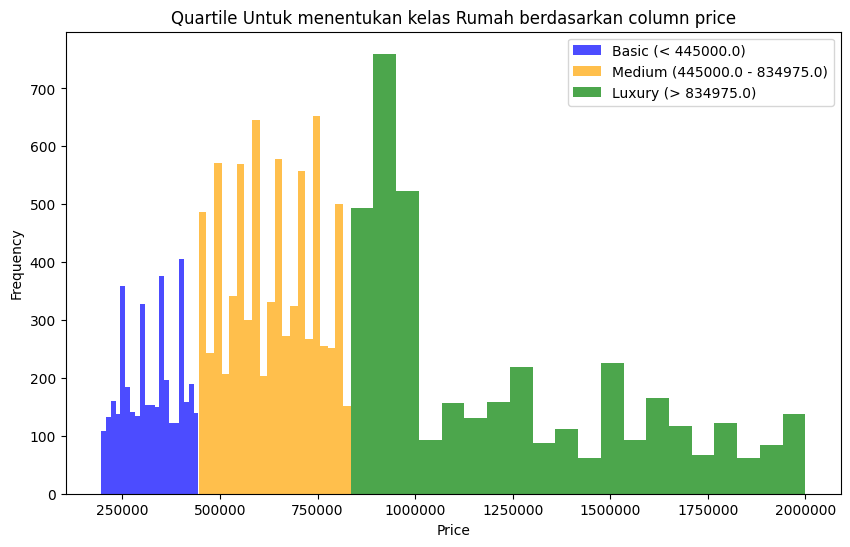

In [ ]:
# Rumus quartiles
quartiles = df_eda['price'].quantile([0.25, 0.5, 0.75])

# Define category
basic = f"Basic (< {quartiles[0.25]})"
Medium = f"Medium ({quartiles[0.25]} - {quartiles[0.75]})"
luxury = f"Luxury (> {quartiles[0.75]})"

# Visualisasi
plt.figure(figsize=(10, 6))

# Kategori rumah basic
plt.hist(df_eda[df_eda['price'] < quartiles[0.25]]['price'], bins=20, color='blue', alpha=0.7, label=basic)

# Kategori rumah Medium
plt.hist(df_eda[(df_eda['price'] > quartiles[0.25]) & (df_eda['price'] < quartiles[0.75])]['price'], bins=20, color='orange', alpha=0.7, label=Medium)

# Kategori rumah Luxury
plt.hist(df_eda[df_eda['price'] > quartiles[0.75]]['price'], bins=20, color='green', alpha=0.7, label=luxury)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Quartile Untuk menentukan kelas Rumah berdasarkan column price')
plt.xticks([250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000], ['250000', '500000', '750000', '1000000', '1250000', '1500000', '1750000', '2000000'])
plt.legend()
plt.show()

Berikut sekiranya gambaran harga tiap kelompok rumah.
- Basic : Basic (< 445000)
- Intermediate : Medium (445000.0 - 834975.0)
- Luxury : Luxury (> 834975.0)

## Distribusi Frekuensi Rumah Per kategori

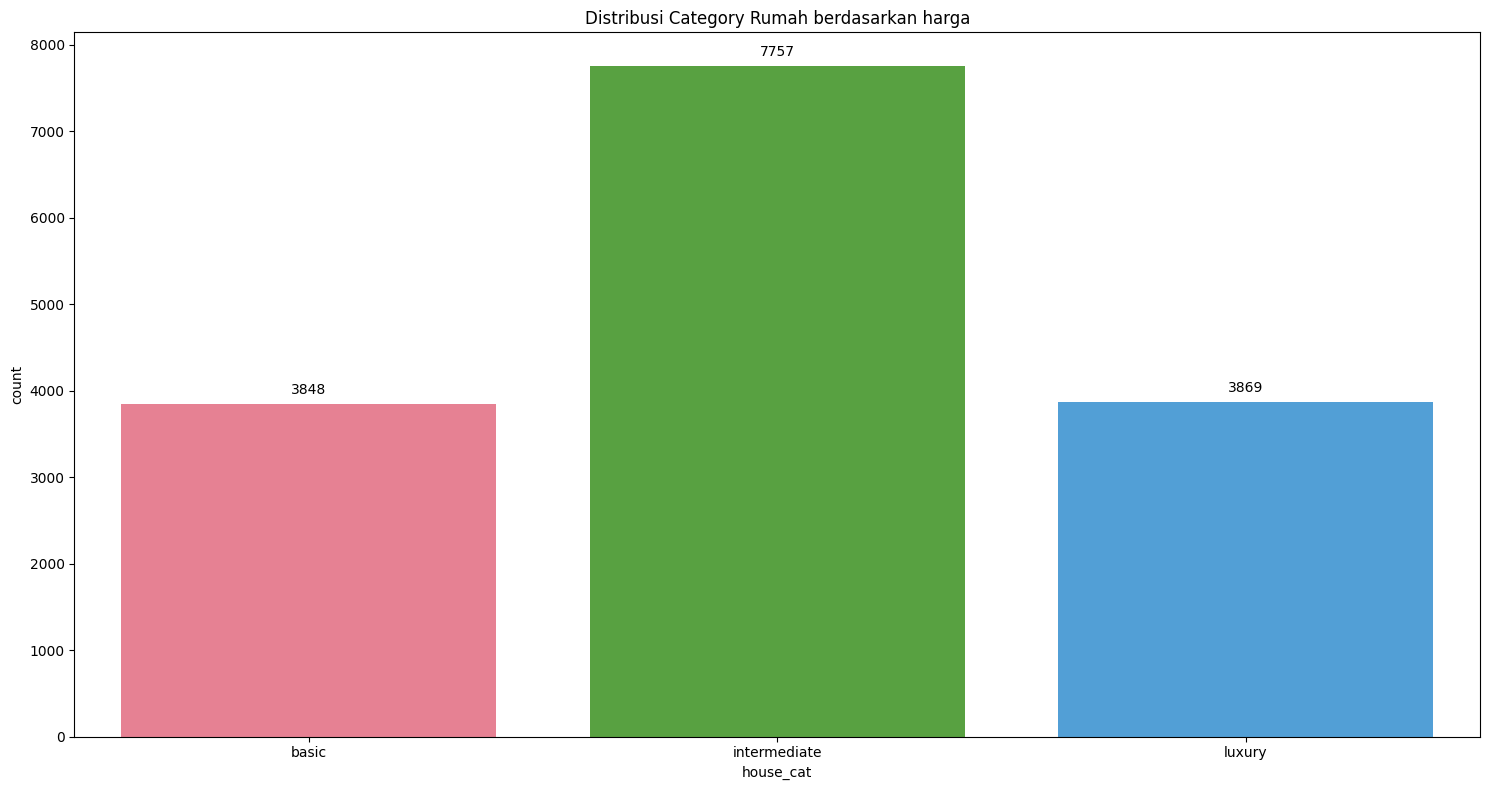

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df_eda, x='house_cat', palette='husl')

# Menambahkan nilai di setiap bar
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().annotate(f'{int(height)}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 5),  # 5 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.title("Distribusi Category Rumah berdasarkan harga")
plt.tight_layout()
plt.show()

Dari ketiga kelompok yang telah dibuat, rumah intermediate memiliki frekuensi paling tinggi dibandingkan dengan kelompok rumah lainnya.

## Visualisasi Distribusi Harga

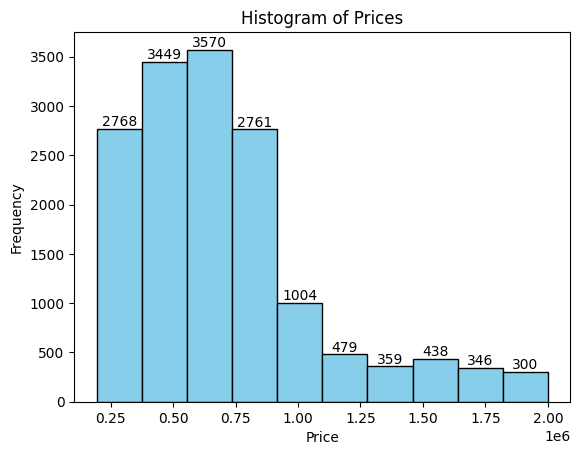

In [ ]:
# Distribusi harga
# Menghitung histogram terlebih dahulu
counts, bin_edges = np.histogram(df_eda['price'], bins=10, density=False)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Memplot histogram menggunakan plt.bar() untuk kontrol yang lebih baik
bar_width = np.diff(bin_edges)  # Lebar bar adalah selisih antara tepi bin
bars = plt.bar(bin_centers, counts, width=bar_width, color='skyblue', edgecolor='black')

# Menambahkan nilai di setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')
plt.show()

Dari histogram tersebut, terlihat bahwa frekuensi tertinggi pada rentang price 0.55 - 0.75 dengan jumlah 3570 dan paling sedikit berada pada rentang harga yang cukup tinggi yaitu 1.80 keatas.

## Visualisasi Frekuensi Kamar Tidur Keseluruhan

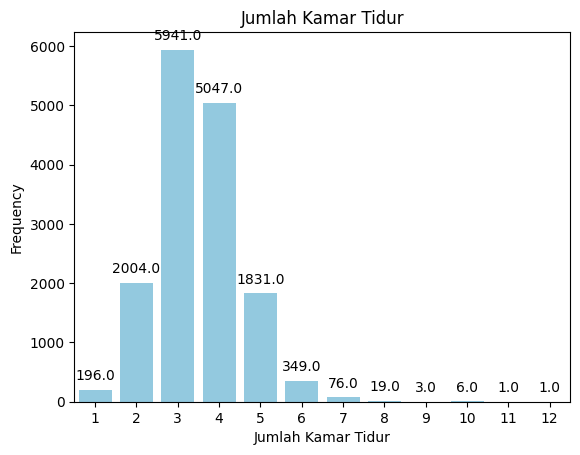

In [ ]:
# Bar Plot Frekuensi kamar tidur
# Membuat countplot
ax = sns.countplot(data=df_eda, x='bed', color='SkyBlue')
plt.title('Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Frequency')

# Menambahkan nilai pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Dalam dataframe keseluruhan, jumlah kamar tidur mayoritas seluruh rumah berada pada jumlah 2 kamar tidur dan paling sedikit berada di angka 11 dan 12 kamar tidur.

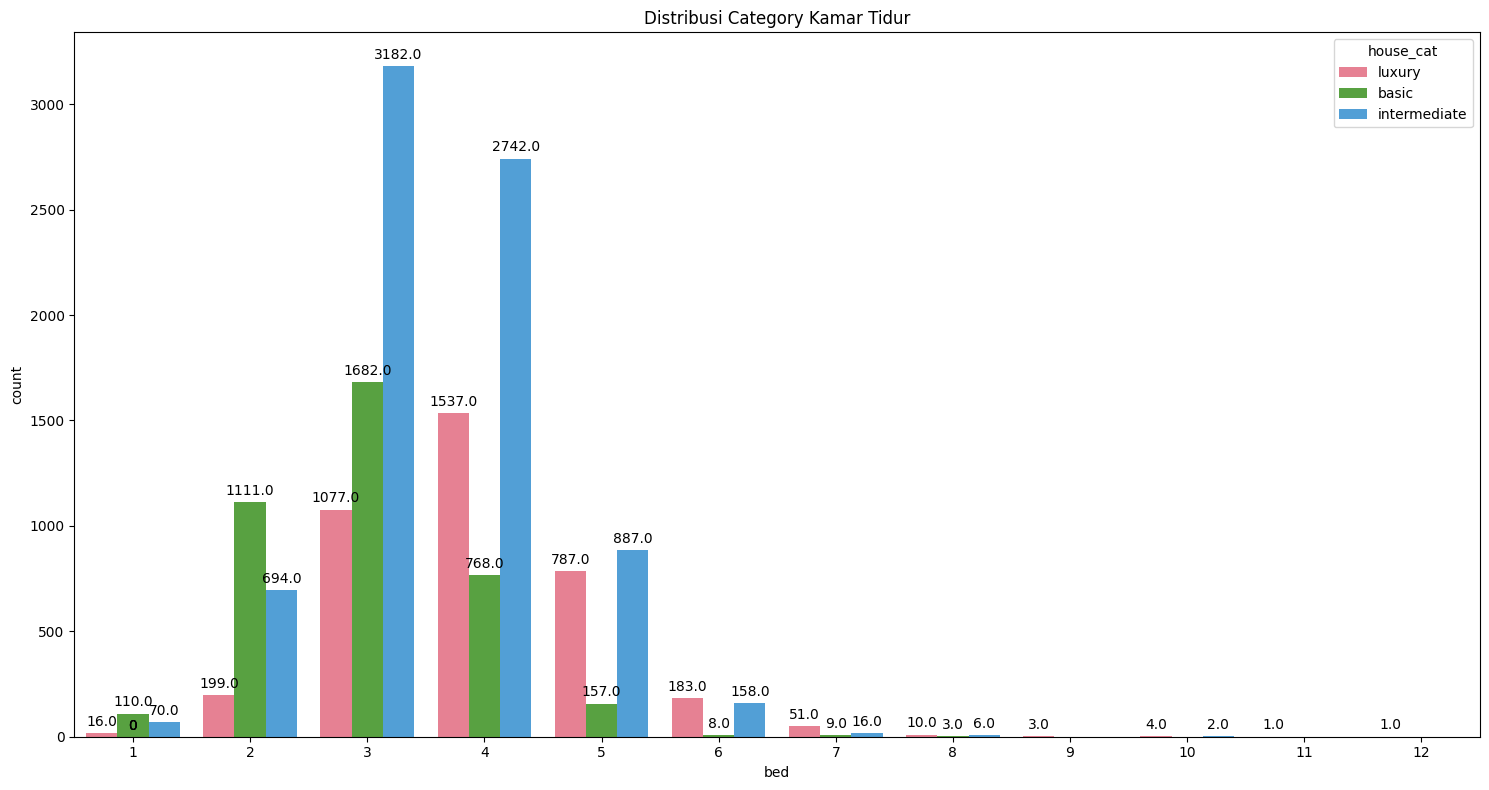

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df_eda, x='bed', hue='house_cat', palette='husl')

# Menambahkan nilai di setiap bar
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().annotate(f'{height}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.title("Distribusi Category Kamar Tidur")
plt.tight_layout()
plt.show()

Pada visualisasi tersebut dapat terlihat bahwa kategori rumah intermediate dan basic mayoritas memiliki 3 kamar tidur, sedangkan rumah luxury mayoritas kamar tidurnya 4 buah.

## Visualisasi Hubungan Luas Bangunan dengan Harga

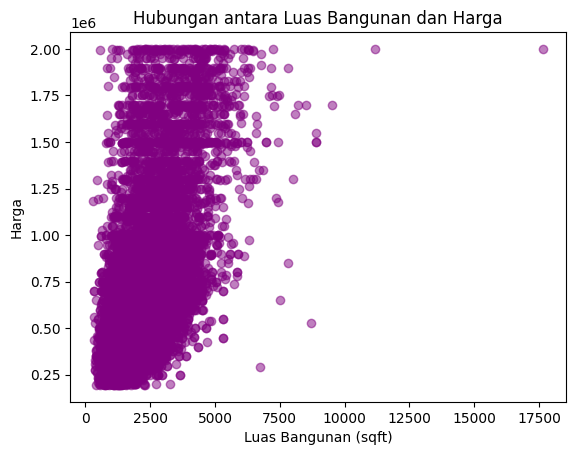

In [ ]:
# Scatter plot hubungan luas bangunan dengan harga
plt.scatter(df_eda['sqft'], df_eda['price'], alpha=0.5, color='purple')
plt.title('Hubungan antara Luas Bangunan dan Harga')
plt.xlabel('Luas Bangunan (sqft)')
plt.ylabel('Harga')
plt.show()

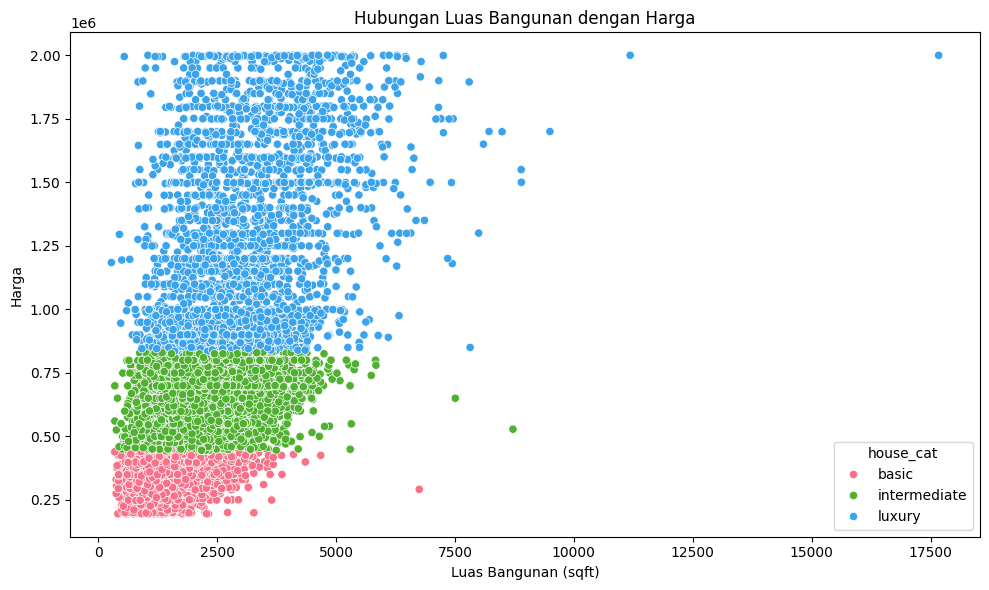

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_eda, x='sqft', y='price', hue='house_cat', palette='husl')
plt.title("Hubungan Luas Bangunan dengan Harga")
plt.xlabel("Luas Bangunan (sqft)")
plt.ylabel("Harga")
plt.tight_layout()
plt.show()

Dari scatterplot tersebut dapat dilihat bahwa luas rumah diatas 5000 m2 memang lebih banyak pada kategori luxury yang sebanding dengan harganya yang lebih mahal.  

## Visualisasi 10 Kota dengan Rata-rata Harga Tertinggi dan Terendah

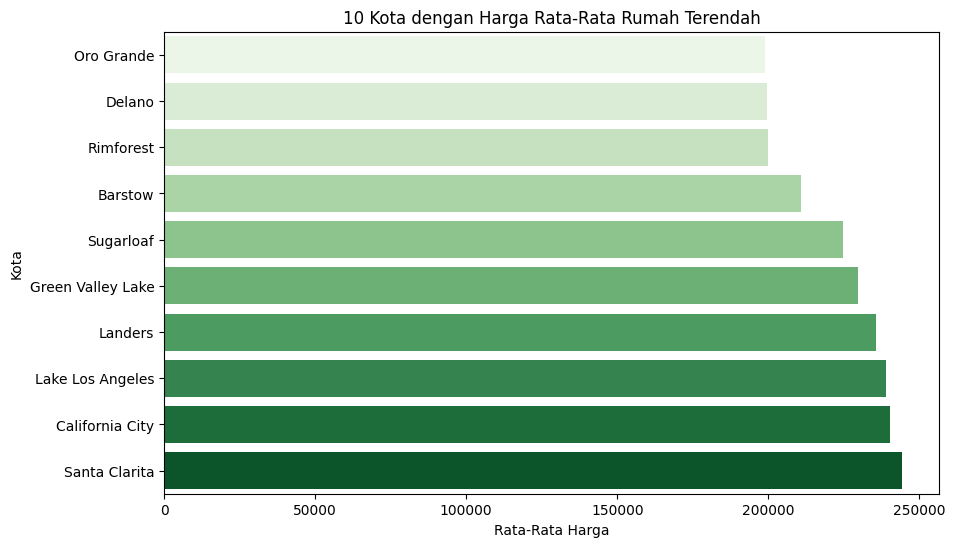

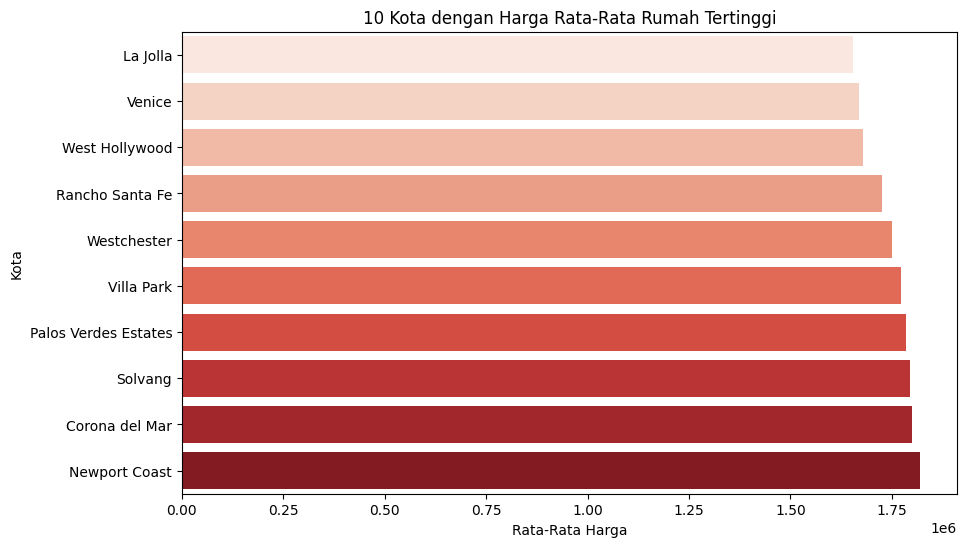

In [ ]:
# Menghitung harga rata-rata per kota dan mengurutkannya
mean_prices = df_eda.groupby('citi')['price'].mean().sort_values()

# Memisahkan 10 kota dengan harga tertinggi dan 10 kota dengan harga terendah
top_10_highest = mean_prices[-10:]  # 10 kota dengan rata-rata harga tertinggi
top_10_lowest = mean_prices[:10]    # 10 kota dengan rata-rata harga terendah

# Membuat barplot untuk 10 kota dengan harga terendah
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran plot
sns.barplot(x=top_10_lowest.values, y=top_10_lowest.index, palette='Greens')
plt.title('10 Kota dengan Harga Rata-Rata Rumah Terendah')
plt.xlabel('Rata-Rata Harga')
plt.ylabel('Kota')
plt.show()

# Membuat barplot untuk 10 kota dengan harga tertinggi
plt.figure(figsize=(10, 6))  # Menyesuaikan ukuran plot
sns.barplot(x=top_10_highest.values, y=top_10_highest.index, palette='Reds')
plt.title('10 Kota dengan Harga Rata-Rata Rumah Tertinggi')
plt.xlabel('Rata-Rata Harga')
plt.ylabel('Kota')
plt.show()

Dari visualisasi ini didapatkan bahwa 10 kota dengan harga rumah terendah di California yaitu Oro Grande, Delano, Rimforest, Barstow, Sugarloaf, Green Valley Lake, Landers, Lake Los Angeles, California City, Santa Clarita.

Sementara itu, 10 kota dengan harga rumah tertinggi yaitu La Jolla, Venice, West Hollywood, Rancho Santa Fe, Westchester, Villa Park, Palos Verdes Estates, Soolvang, Corona del Mar, Newport Coast.

##**Distribusi Kategori Kamar mandi**

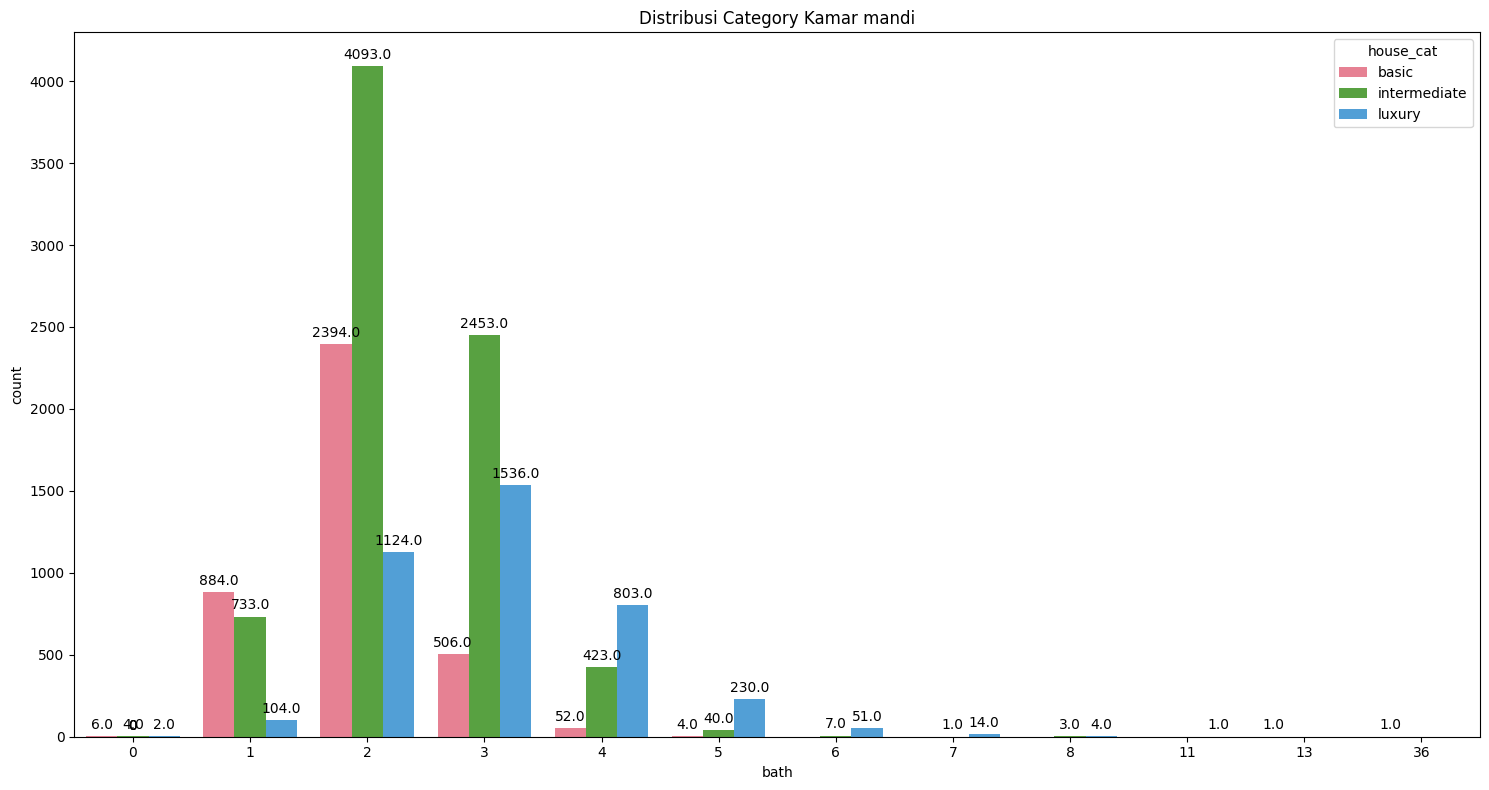

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df_eda, x='bath', hue='house_cat', palette='husl')

# Menambahkan nilai di setiap bar
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().annotate(f'{height}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

plt.title("Distribusi Category Kamar mandi")
plt.tight_layout()
plt.show()

Pada visualisasi tersebut dapat terlihat bahwa kategori rumah intermediate dan basic mayoritas memiliki 2 kamar mandi, sedangkan rumah luxury mayoritas terdapat 3 kamar mandi.

## Check Correlation

interval columns not set, guessing: ['image_id', 'n_citi', 'bed', 'bath', 'sqft', 'price']


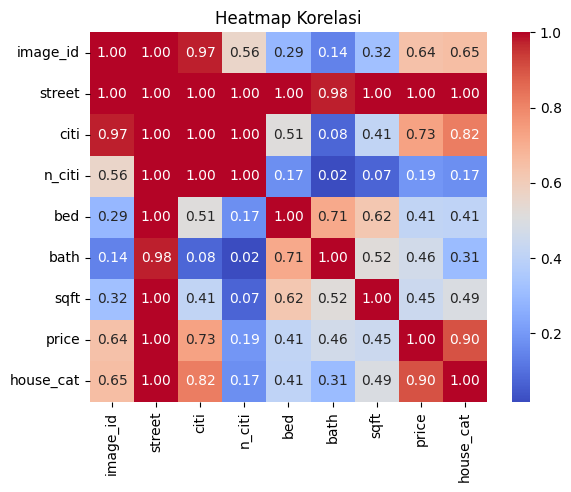

In [ ]:
heatmap_corr = df_eda.phik_matrix()
sns.heatmap(heatmap_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

Apabila dilihat korelasi, feature yang berkorelasi cukup tinggi dengan target (Price) dengan threshold 0.3 yaitu image_id, citi, street, bed, bath, sqft.

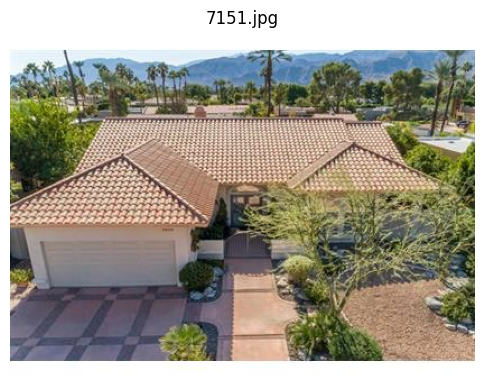

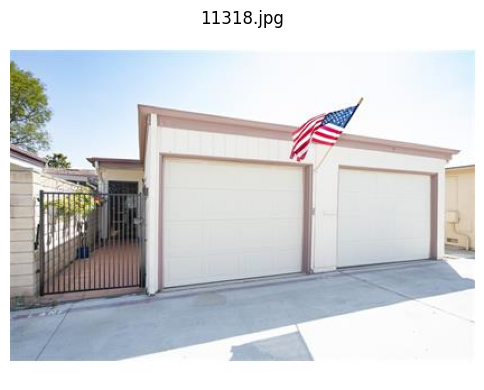

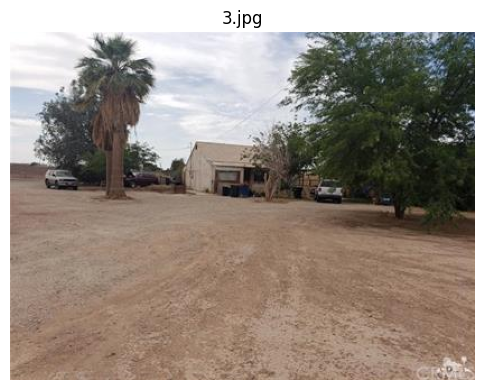

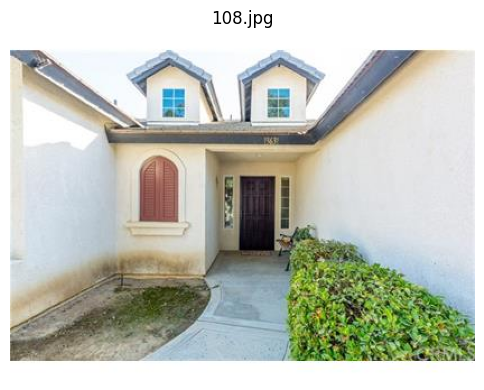

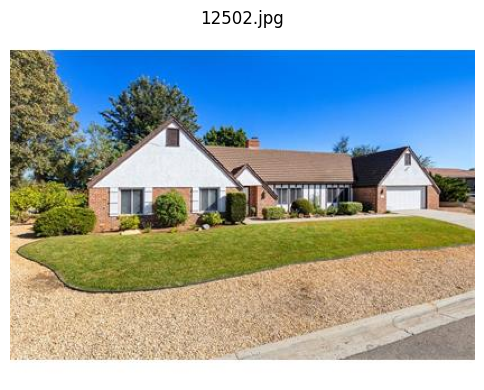

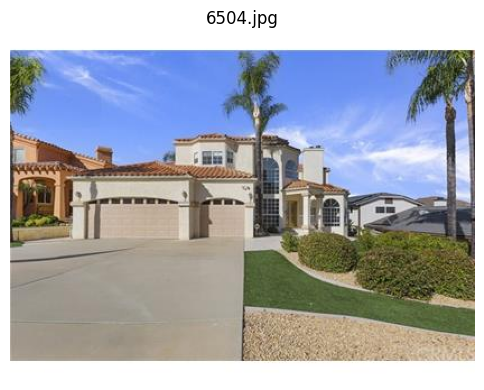

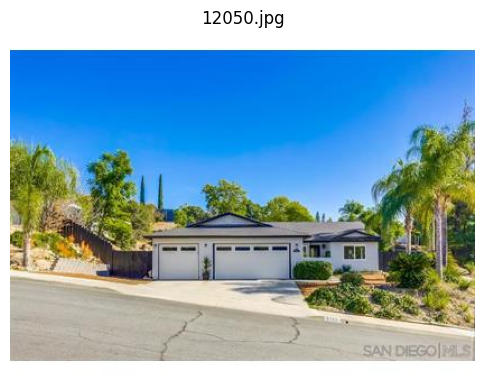

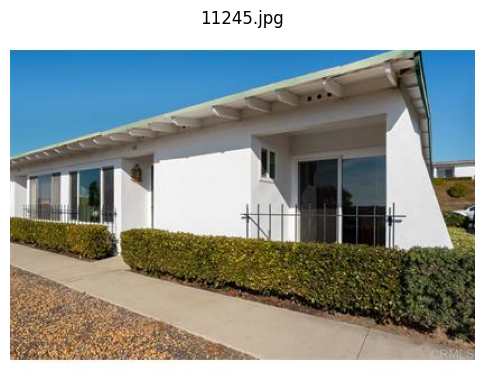

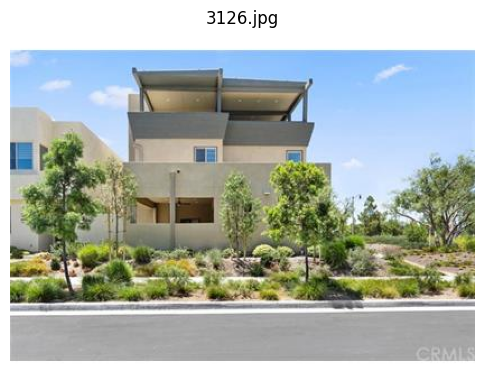

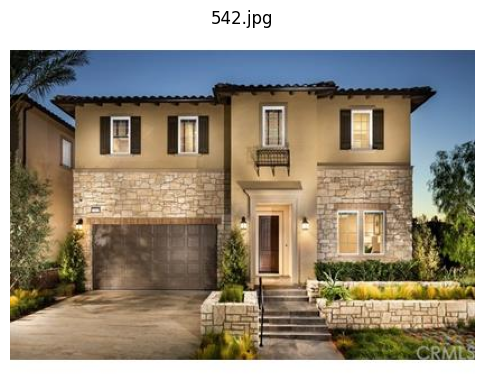

In [ ]:
# Path ke folder '/content/socal2/socal_pics'
image_folder_path = '/content/socal2/socal_pics'

# List semua file gambar di folder
image_files = [f for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f))]

# Ambil 10 contoh gambar pertama
for i in range(10):
    if i < len(image_files):
        image_path = os.path.join(image_folder_path, image_files[i])

        # Baca gambar menggunakan OpenCV
        image = cv2.imread(image_path)

        # Ubah format warna dari BGR (OpenCV) ke RGB (matplotlib)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Tampilkan gambar menggunakan matplotlib
        plt.figure(figsize=(6, 6))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title(image_files[i])
        plt.show()

Berikut contoh 10 gambar rumah yang terdapat dalam dataset.

# v. Feature Engineering

In [ ]:
# copy dataset untuk melakukan FE
df1 = df.copy()

Sebelum melakukan feature engineering, kami copy dataset agar dataset awal (df) tidak terjadi perubahan.

In [ ]:
# Inisialisasi variable
cnt = 0  # Counter to keep track of the number of images processed
# Create an empty numpy array to store images with shape (15474, 64, 64, 3) and data type 'uint32'
X_house_images = np.zeros((15474, 64, 64, 3), dtype='uint32')

# Loop through a range of image indices (assuming they start from 0 and go up to 15473)
for i in range(15474):
    # Read an image using OpenCV based on its filename and path
    sample = cv2.imread(image_folder_path + '/' + str(i) + '.jpg')
    # Resize the image to dimensions 64x64
    imgs = cv2.resize(sample, (64, 64))
    # Assign the resized image to the array of images at the current index 'cnt'
    X_house_images[cnt] = imgs
    # Increment the counter
    cnt += 1

# Display the total number of images processed
print("No. of images: ", cnt)

No. of images:  15474


Kami melakukan resize image menjadi 64 x 64 pixel dan disimpan dalam X_house_images.

## **Split X Y**

In [ ]:
# Normalize pixel values in image data by scaling them between 0 and 1
X_house_images = X_house_images/255.0

Semua image dalam dataset dilakukan scaling.

In [ ]:
X_data_tab = df1[["image_id", "street", "citi", "n_citi","bed","bath","sqft", "price"]]
y_data = df1["price"]

Membagi data tabular sesuai kolom yang diinginkan.

In [ ]:
# Split data tabular dan data gambar menjadi train dan test
Xatt_train, Xatt_test, Ximage_train, Ximage_test = train_test_split(X_data_tab, X_house_images, test_size=0.25, random_state=42)

# Split target (harga) menjadi train dan test
y_train , y_test = Xatt_train['price'], Xatt_test['price']

# Pisahkan fitur tabular untuk train dan test
X_train = Xatt_train[["image_id", "street", "citi", "n_citi", 'bed',"bath","sqft"]]
X_test = Xatt_test[["image_id", "street", "citi", "n_citi", 'bed',"bath","sqft"]]

# Pisahkan fitur gambar untuk train dan test
X2_train = Ximage_train
X2_test = Ximage_test

# Split data train tabular dan gambar menjadi train dan validation
X_train, X_val, X2_train, X2_val, y_train, y_val = train_test_split(X_train, X2_train, y_train, test_size=0.2, random_state=42)

# Tampilkan ukuran setiap data
print(f"X_train shape (tabular): {X_train.shape}\n"
      f"X_train shape (images): {X2_train.shape}\n")

print(f"X_val shape (tabular): {X_val.shape}\n"
      f"X_val shape (images): {X2_val.shape}\n")

print(f"X_test shape (tabular): {X_test.shape}\n"
      f"X_test shape (images): {X2_test.shape}\n")

print(f"y_train shape: {y_train.shape}\n"
      f"y_val shape: {y_val.shape}\n"
      f"y_test shape: {y_test.shape}")

X_train shape (tabular): (9284, 7)
X_train shape (images): (9284, 64, 64, 3)

X_val shape (tabular): (2321, 7)
X_val shape (images): (2321, 64, 64, 3)

X_test shape (tabular): (3869, 7)
X_test shape (images): (3869, 64, 64, 3)

y_train shape: (9284,)
y_val shape: (2321,)
y_test shape: (3869,)


Kemudian, data dibagi menjadi train, test, dan validation yang selanjutnya dilakukan pengecekan missing value.

In [ ]:
# Missing Value X_train Checking
X_train.isnull().sum()

image_id    0
street      0
citi        0
n_citi      0
bed         0
bath        0
sqft        0
dtype: int64

In [ ]:
# Missing Value X_test Checking
X_test.isnull().sum()

image_id    0
street      0
citi        0
n_citi      0
bed         0
bath        0
sqft        0
dtype: int64

In [ ]:
# Missing Value X_val Checking
X_val.isnull().sum()

image_id    0
street      0
citi        0
n_citi      0
bed         0
bath        0
sqft        0
dtype: int64

In [ ]:
# Missing Value y_train Checking
y_train.isnull().sum()

0

In [ ]:
# Missing Value y_test Checking
y_test.isnull().sum()

0

In [ ]:
# Missing Value y_val Checking
y_val.isnull().sum()

0

Setelah semua dicek, tidak terdapat satupun missing value di setiap bagian. Maka selanjutnya akan dilakukan pengecekan dan handling outlier.

## **Outlier Checking dan Handling**

In [ ]:
# melihat kolom bernilai numerik
numeric_col = X_train.select_dtypes(include='number')
numeric_list= numeric_col.columns.tolist()

print(numeric_list)

['image_id', 'n_citi', 'bed', 'bath', 'sqft']


Terdapat 5 kolom bernilai numerik yang selanjutnya dilihat skewness.

In [ ]:
# skewness checking dan handling untuk numerical
pd.DataFrame({'Skewness X train':X_train.skew()})

Skewness X train
image_id         -0.025491
n_citi           -0.120590
bed               0.564805
bath              1.153982
sqft              1.254391

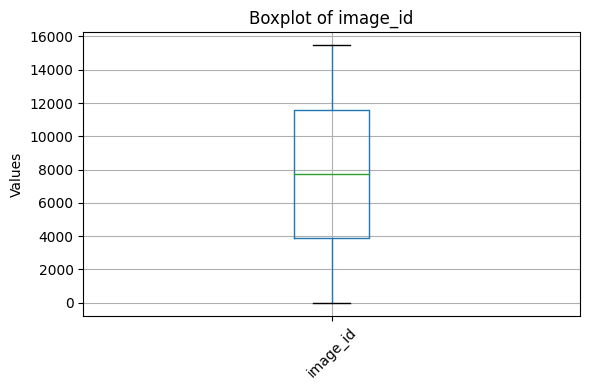

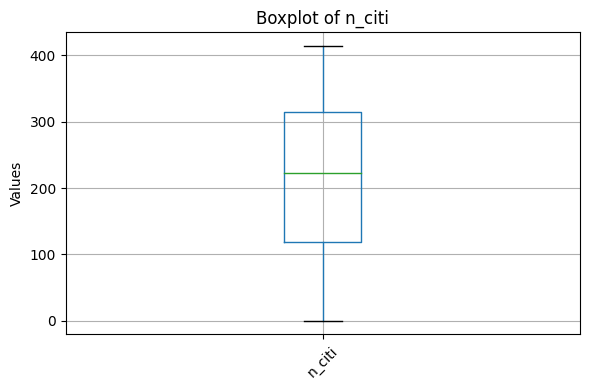

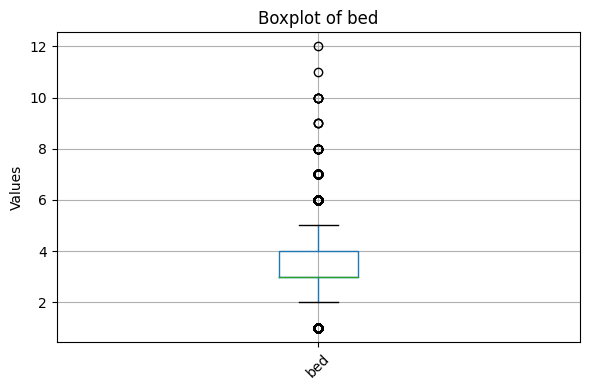

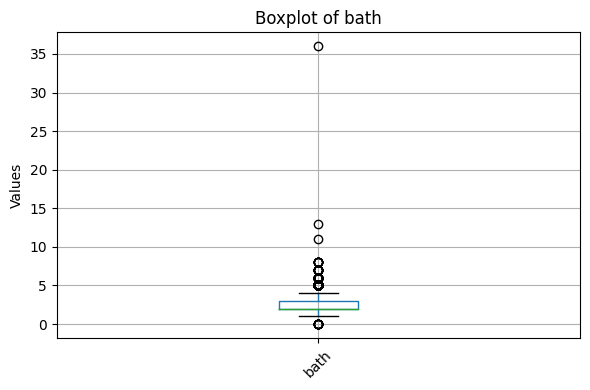

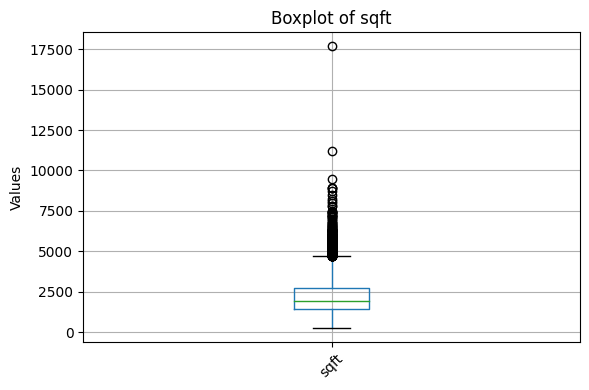

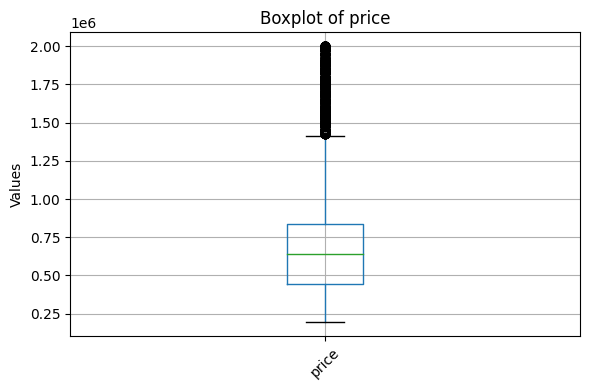

In [ ]:
numerical_columns = ['image_id', 'n_citi', 'bed', 'bath', 'sqft', 'price']

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.tight_layout()
    plt.show()

Berdasarkan hasil analisa skewness dan boxplot, kolom potensial outlier adalah `sqft`, `bath`.

**Penentuan nilai indikasi skew**   
value : -0,5 - 0,5 = Normal    
value : 0,5 - 1 or -0,5 to -1 = Skew    
value : Above 1 or below -1 = Extreme skew    

kolom bath = 1.064022 artinya skew     
kolom sqft = 1.549205 artinya extreme skew     

In [ ]:
# Cek jumlah outlier dan persentasenya untuk nilai skew kolom (bath) menggunakan iqr 3

# Tentukan IQR 3
def calculate_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    return q3 - q1

# Buat fungsi cek outlier
def check_outliers_iqr(series):
    iqr = calculate_iqr(series)
    lower_bound = series.quantile(0.25) - 3 * iqr
    upper_bound = series.quantile(0.75) + 3 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Columns untuk cek outlier
columns_to_trim = ['bath', 'sqft']

# prin outlier value dan persentasenya
for column in columns_to_trim:
    outliers = check_outliers_iqr(df[column])
    outlier_count = outliers.shape[0]
    total_count = df.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100
    print(f"Outlier di kolom '{column}':")
    print(f"   - Jumlah Outlier: {outlier_count}")
    print(f"   - Persentase Outlier: {outlier_percentage:.2f}%")

Outlier di kolom 'bath':
   - Jumlah Outlier: 25
   - Persentase Outlier: 0.16%
Outlier di kolom 'sqft':
   - Jumlah Outlier: 32
   - Persentase Outlier: 0.21%


Meskipun hasil (percentage outlier) dibawah 5 %, kami tetap akan melakukan capping dengan median agar tidak membuang data yang tersedia. Data dicapping dengan median karena kolom tersebut terdapat outlier sehingga sensitif apabila menggunakan mean. Maka, kami menggunakan median.

In [ ]:
# Capping outliers untuk kolom bath dan sqft pada X_train
X_train_capped = X_train.copy()

for column in columns_to_trim:
    # Hitung median
    median_value = X_train_capped[column].median()

    # Tentukan batas atas dan batas bawah
    iqr = calculate_iqr
    upper_limit = median_value + 3 * iqr(X_train_capped[column])
    lower_limit = median_value - 3 * iqr(X_train_capped[column])

    # Capping nilai yang melebihi batas atas dan batas bawah dengan nilai median
    X_train_capped[column] = np.where(X_train_capped[column] > upper_limit, median_value, X_train_capped[column])
    X_train_capped[column] = np.where(X_train_capped[column] < lower_limit, median_value, X_train_capped[column])

    # Hapus baris yang melebihi batas atas dan batas bawah
    outliers_indices = (X_train_capped[column] > upper_limit) | (X_train_capped[column] < lower_limit)
    X_train_capped = X_train_capped[~outliers_indices]

Setelah data dicapping dengan median, kami melakukan feature selection untuk memilih feature yang memang berkorelasi dengan target (`price`).

## Feature Selection

In [ ]:
# Check Korelasi untuk numeric column
df1.corr()['price'].sort_values(ascending=False)

price       1.000000
sqft        0.583457
bath        0.467161
bed         0.348711
image_id    0.094821
n_citi      0.047169
Name: price, dtype: float64

In [ ]:
# Drop Columns yang mempunyai korelasi rendah dengan target (< 0,01) dan kolom kategorikal yang high cardinality (citi dan street)
X_train_capped.drop(['image_id', 'n_citi', 'street'], axis=1, inplace=True)
X_val.drop(['image_id', 'n_citi', 'street'], axis=1, inplace=True)
X_test.drop(['image_id', 'n_citi', 'street'], axis=1, inplace=True)

X_train

image_id                 street             citi  n_citi  bed  bath  \
6274       6274  31011 Lausanne Street    Lake Elsinore     185    5     2   
11305     11305      315 Verbena Drive  Borrego Springs      46    3     3   
15338     15338      2451 Dillon Court    Thousand Oaks     372    4     3   
13949     13949   6329 Hog Canyon Road       San Miguel     329    5     3   
1030       1030  15415 Calle Primavera     Green Valley     133    2     2   
...         ...                    ...              ...     ...  ...   ...   
14243     14243    1558 Donelson Place        Templeton     370    3     2   
588         588        15433 Tetley St  Rowland Heights     315    5     5   
6828       6828  82723 Monarchos Court            Indio     154    2     2   
8715       8715    5443 Newbury Avenue   San Bernardino     318    4     2   
10070     10070  41920 Evergreen Drive         Big Bear      38    3     2   

       sqft  
6274   2628  
11305  2600  
15338  1923  
13949  3186  
1030   1056  
...     ...  
14243  2504  
588    4503  
6828   2231  
8715   1222  
10070  1965  

[9284 rows x 7 columns]

Berdasarkan hasil feature selection, `image_id` dan `n_cit` memiliki korelasi yang rendah, sedangkan `street` memang berkorelasi tinggi apabila dilihat di EDA. Namun, alasan kami drop `street` karena feature tersebut memiliki high cardinality yang sulit kami handling. Sehingga ketiga kolom tersebut kami drop.

## Pipeline

In [ ]:
# define numerik dan kategorik features dari dataframe x_train yang sudah dihandle outlier berdasarkan tipe kolom
# define numerik di x_train
num_col = ['bed', 'bath', 'sqft']

# define kategorikal nominal
cat_col = ['citi']

# print
print(f'numerical columns= {num_col}')
print(f'categorical columns= {cat_col}')

numerical columns= ['bed', 'bath', 'sqft']
categorical columns= ['citi']


Kolom numerik dan kategorik yang terpilih kemudian dipisah sebelum discaling dan encoding.

In [ ]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Inisialisasi OneHotEncoder untuk kategori nominal
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Menggabungkan scaler dan encoder dalam ColumnTransformer
final_pipeline = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),  # Melakukan scaling pada kolom numerik
        ('nom', onehot_encoder, cat_col),  # Melakukan one-hot encoding pada kolom nominal
    ],
    remainder='passthrough'  # Biarkan fitur-fitur lainnya tanpa perubahan
)

Kami melakukan scaling dan encoding didalam pipeline agar mempermudah dan mempercepat. Setelah itu, X_train_capped di fit dan transform sedangakn X_val dan X_test hanya di transform.

In [ ]:
# Fit and Transform pada data latih
X_train_transformed = final_pipeline.fit_transform(X_train_capped)
# Transform pada data val dan test
X_val_transformed = final_pipeline.transform(X_val)
X_test_transformed = final_pipeline.transform(X_test)

# Konversi hasil transformasi menjadi DataFrame
# Dapatkan nama fitur untuk kolom numerik
num_features = final_pipeline.transformers_[0][2]
# Dapatkan nama fitur untuk kolom kategorikal setelah one-hot encoding
cat_features = final_pipeline.named_transformers_['nom'].get_feature_names_out(cat_col)
# Gabungkan nama fitur numerik dan kategorikal
all_features = list(num_features) + list(cat_features)

# Konversi matriks hasil transformasi menjadi DataFrame
X_train = pd.DataFrame(X_train_transformed.toarray(), columns=all_features)
X_val = pd.DataFrame(X_val_transformed.toarray(), columns=all_features)
X_test = pd.DataFrame(X_test_transformed.toarray(), columns=all_features)

Dikarenakan setelah fit dan transform, datanya tidak berbentuk dataframe, maka kami juga melakukan konversi menjadi dataframe.

In [ ]:
X_train

bed      bath      sqft  citi_29 Palms  citi_Acton  citi_Adelanto  \
0     1.434569 -0.467783  0.491593            0.0         0.0            0.0   
1    -0.494675  0.704072  0.462475            0.0         0.0            0.0   
2     0.469947  0.704072 -0.241556            0.0         0.0            0.0   
3     1.434569  0.704072  1.071874            0.0         0.0            0.0   
4    -1.459298 -0.467783 -1.143175            0.0         0.0            0.0   
...        ...       ...       ...            ...         ...            ...   
9279 -0.494675 -0.467783  0.362642            0.0         0.0            0.0   
9280  1.434569  3.047782  2.441460            0.0         0.0            0.0   
9281 -1.459298 -0.467783  0.078742            0.0         0.0            0.0   
9282  0.469947 -0.467783 -0.970546            0.0         0.0            0.0   
9283 -0.494675 -0.467783 -0.197879            0.0         0.0            0.0   

      citi_Agoura Hills  citi_Agua Dulce  citi_Aguanga  citi_Alhambra  ...  \
0                   0.0              0.0           0.0            0.0  ...   
1                   0.0              0.0           0.0            0.0  ...   
2                   0.0              0.0           0.0            0.0  ...   
3                   0.0              0.0           0.0            0.0  ...   
4                   0.0              0.0           0.0            0.0  ...   
...                 ...              ...           ...            ...  ...   
9279                0.0              0.0           0.0            0.0  ...   
9280                0.0              0.0           0.0            0.0  ...   
9281                0.0              0.0           0.0            0.0  ...   
9282                0.0              0.0           0.0            0.0  ...   
9283                0.0              0.0           0.0            0.0  ...   

      citi_Wildomar  citi_Wilmington  citi_Winchester  citi_Winnetka  \
0               0.0              0.0              0.0            0.0   
1               0.0              0.0              0.0            0.0   
2               0.0              0.0              0.0            0.0   
3               0.0              0.0              0.0            0.0   
4               0.0              0.0              0.0            0.0   
...             ...              ...              ...            ...   
9279            0.0              0.0              0.0            0.0   
9280            0.0              0.0              0.0            0.0   
9281            0.0              0.0              0.0            0.0   
9282            0.0              0.0              0.0            0.0   
9283            0.0              0.0              0.0            0.0   

      citi_Wofford Heights  citi_Woodland Hills  citi_Wrightwood  \
0                      0.0                  0.0              0.0   
1                      0.0                  0.0              0.0   
2                      0.0                  0.0              0.0   
3                      0.0                  0.0              0.0   
4                      0.0                  0.0              0.0   
...                    ...                  ...              ...   
9279                   0.0                  0.0              0.0   
9280                   0.0                  0.0              0.0   
9281                   0.0                  0.0              0.0   
9282                   0.0                  0.0              0.0   
9283                   0.0                  0.0              0.0   

      citi_Yorba Linda  citi_Yucaipa  citi_Yucca Valley  
0                  0.0           0.0                0.0  
1                  0.0           0.0                0.0  
2                  0.0           0.0                0.0  
3                  0.0           0.0                0.0  
4                  0.0           0.0                0.0  
...                ...           ...                ...  
9279               0.0   

Setelah dilakukan feature engineering, data X_train terdiri dari 9284 baris dengan 398 kolom. Data telah siap dimasukkan kedalam model.

# vi. Model 1 (Without Improvement)


Model 1 yang akan kami buat merupakan model apa adanya tanpa dilakukan improvement yang berarti sehingga hasilnya kemungkinan tidak terlalu baik.

## Model Definition

In [ ]:
# Clear Architecture
seed = 20 # Seperti random state set bebas terserah
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Define the Multi-Layer Perceptron (MLP) model
mlp_input = Input(shape=(X_train.shape[1],))  # Input layer for MLP with input shape derived from training data
mlp_layer = Dense(8, activation='relu')(mlp_input)  # Dense layer with 8 neurons and ReLU activation
mlp_output = Dense(4, activation='relu')(mlp_layer)  # Dense layer with 4 neurons and ReLU activation for MLP output

# Define the Convolutional Neural Network (CNN) model
cnn_input = Input(shape=(64, 64, 3))  # Input layer for CNN assuming 64x64 images with 3 channels
cnn_layer = Conv2D(16, (3, 3), activation='relu')(cnn_input)  # CNN layer with 16 filters, 3x3 kernel, and ReLU activation
# Add more CNN layers
cnn_output = Flatten()(cnn_layer)  # Flatten CNN output to be compatible with the MLP

# Concatenate both models (MLP and CNN)
combined = concatenate([mlp_output, cnn_output])  # Concatenating the outputs of MLP and flattened CNN
x = Dense(4, activation='relu')(combined)  # Dense layer with 4 neurons and ReLU activation for combined output
output = Dense(1)(x)  # Output layer (regression task), no activation function specified

# Create the combined model using functional API
model1 = Model(inputs=[mlp_input, cnn_input], outputs=output)  # Defining inputs and outputs for the combined model

# Compile the model specifying optimizer and loss function
model1.compile(optimizer='adam', loss='mean_absolute_error')

model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 398)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 dense (Dense)               (None, 8)                    3192      ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 62, 62, 16)           448       ['input_2[0][0]']             
                                                                                              

Model 1 ini merupakan model gabungan dari MLP yang hanya terdiri dari 3 layer dan CNN yang juga terdiri dari 3 layer. Model CNN tersebut perlu diflatten di output agar dapat diconcate dengan MLP. Lebih jelasnya, dapat dilihat pada plot dibawah.

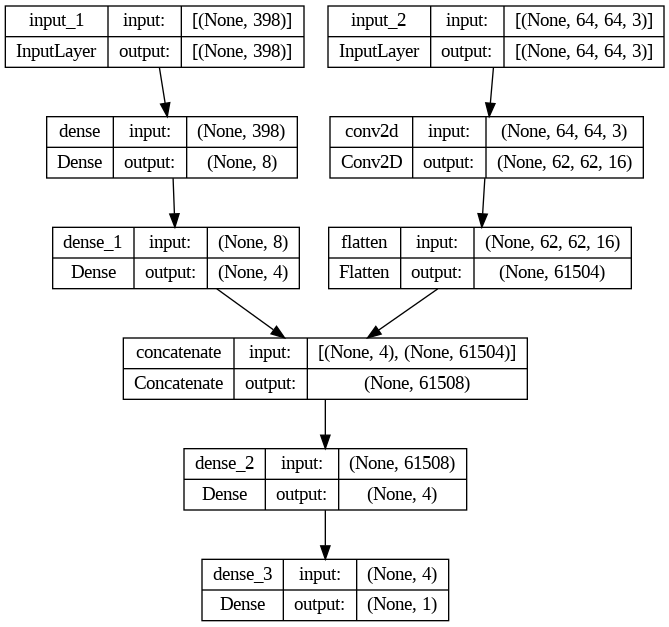

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model1,show_shapes=True)

## Model Training

In [ ]:
# Train the model using training data and validate it using val data
%%time
history1 = model1.fit(
    x=[X_train, X2_train],  # Input data for the model (two inputs X_train and X2_train)
    y=y_train,  # Target data (labels)
    validation_data=([X_val, X2_val], y_val),  # Validation data
    epochs=100,  # Number of training epochs
    batch_size=100  # Batch size for optimization
)

Epoch 1/100
93/93 [==============================] - 6s 21ms/step - loss: 695411.6250 - val_loss: 680931.9375
Epoch 2/100
93/93 [==============================] - 1s 10ms/step - loss: 624714.3125 - val_loss: 546973.7500
Epoch 3/100
93/93 [==============================] - 1s 8ms/step - loss: 430661.5312 - val_loss: 337088.8438
Epoch 4/100
93/93 [==============================] - 1s 8ms/step - loss: 298189.9375 - val_loss: 293739.8438
Epoch 5/100
93/93 [==============================] - 1s 9ms/step - loss: 286979.4688 - val_loss: 293304.8438
Epoch 6/100
93/93 [==============================] - 1s 9ms/step - loss: 286703.7188 - val_loss: 293007.0625
Epoch 7/100
93/93 [==============================] - 1s 9ms/step - loss: 286390.7812 - val_loss: 292671.8438
Epoch 8/100
93/93 [==============================] - 1s 9ms/step - loss: 286045.7812 - val_loss: 292316.8750
Epoch 9/100
93/93 [==============================] - 1s 9ms/step - loss: 285688.5312 - val_loss: 291937.1562
Epoch 10/100
93/9

Training model dilakukan dengan hyperparameter tertera dan dibutuhkan waktu kurang dari 3 menit (tergantung dengan GPU dan koneksi).

## Model Evaluation

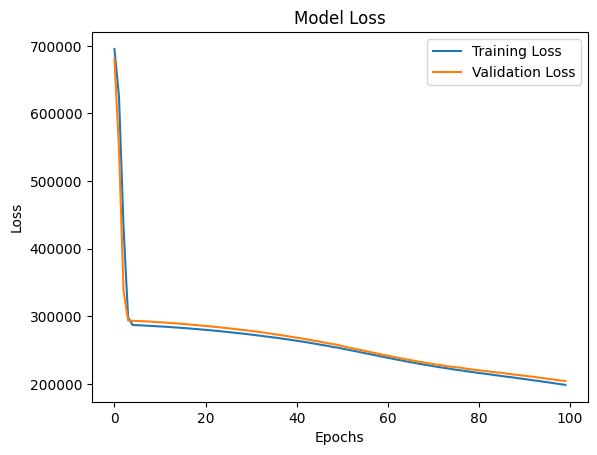

In [ ]:
# Plotting the training and validation loss over epochs
plt.plot(history1.history['loss'], label='Training Loss')  # Plotting training loss
plt.plot(history1.history['val_loss'], label='Validation Loss')  # Plotting validation loss
plt.title('Model Loss')  # Title of the plot
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.legend()  # Display legend
plt.show()  # Show the plot

In [ ]:
# Make predictions using the trained model
predictions = model1.predict([X_test, X2_test])

121/121 [==============================] - 1s 4ms/step


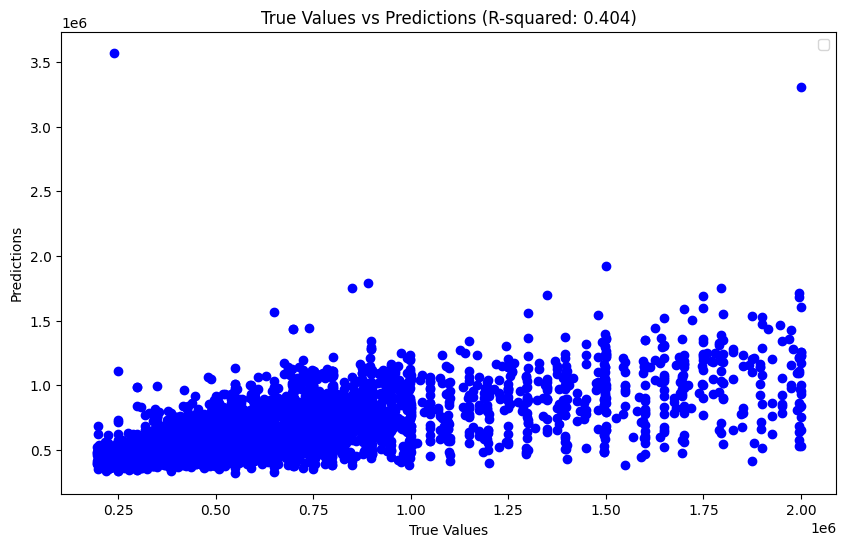

In [ ]:
# Calculate R-squared
r_squared = r2_score(y_test, predictions)

# Plotting true values vs. predicted values with R-squared in the title
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, c='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'True Values vs Predictions (R-squared: {r_squared:.3f})')
plt.legend()
plt.show()

In [ ]:
# Model Evaluation

model_metric1 = model1.evaluate([X_test, X2_test], y_test)
print(f'MAE:\t{model_metric1}')

121/121 [==============================] - 0s 3ms/step - loss: 201086.3750
MAE:	201086.375


Evaluasi Model 1 ini didapatkan angka:
- R squared = 0.404
- MAE = 201086.375

Dapat disimpulkan bahwa model 1 dapat menjelaskan 40% variasi dalam data dan rata-rata selisih absolut antara prediksi model dan nilai aktual adalah sekitar 201086.375.

#vii. Model 2 (With Improvement)


Pada model 2 ini, kami melakukan beberapa improvement dengan membuat fungsi dan menambahkan layer pada model yang diharapkan hasilnya lebih baik dari model sebelumnya yaitu model 1.

## Model Definition

In [ ]:
# Clear Architecture
seed = 20 # Seperti random state set bebas terserah
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Define function to create MLP model

def create_ann(dim, regress=False):
    model = Sequential()
    model.add(Dense(128, input_dim=dim, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="linear"))
    return model

Fungsi create_ann ini merupakan model sequential MLP yang dibuat dengan 4 layer.

In [ ]:
# Define function to create CNN model

def create_cnn(width, height, depth, regress=False):
    inputShape = (height, width, depth)
    inputs = Input(shape=inputShape)
    baseModel = VGG16(include_top=False, input_tensor=Input(shape=inputShape))

    x = baseModel.output
    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(4, activation="relu")(x)

    model = Model(inputs=baseModel.input, outputs=x)

    # Membekukan lapisan pada baseModel untuk tidak dilatih
    for layer in baseModel.layers:
        layer.trainable = False

    return model

Fungsi create_cnn merupakan model CNN dan kami menambahkan pretrained model yaitu VGG16 yang diharapkan dapat membuat prediksi model lebih baik.

In [ ]:
# Create the MLP and CNN models separately
mlp = create_ann(X_train.shape[1], regress=False)  # Creating the MLP model using a function 'create_ann'
cnn = create_cnn(64, 64, 3, regress=False)  # Creating the CNN model using a function 'create_cnn'

# Combine the outputs of MLP and CNN models
combinedInput = concatenate([mlp.output, cnn.output])  # Concatenating the outputs of MLP and CNN models

# Further processing through Dense layers
x = Dense(4, activation="relu")(combinedInput)  # Dense layer with 4 neurons and ReLU activation
output = Dense(1, activation="linear")(x)  # Output layer with linear activation function (regression task)

model2 = Model(inputs=[mlp.input, cnn.input], outputs=output)
model2.compile(optimizer='nadam', loss='mean_absolute_error')

model2.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 64, 64, 64)           1792      ['input_2[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 64, 64, 64)           36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)           0         ['block1_conv2[0][0]']        
                           

Kemudian fungsi yang telah dibuat tersebut diconcate dan ditambahkan beberapa layer kembali yang detailnya dapat dilihat dibawah.

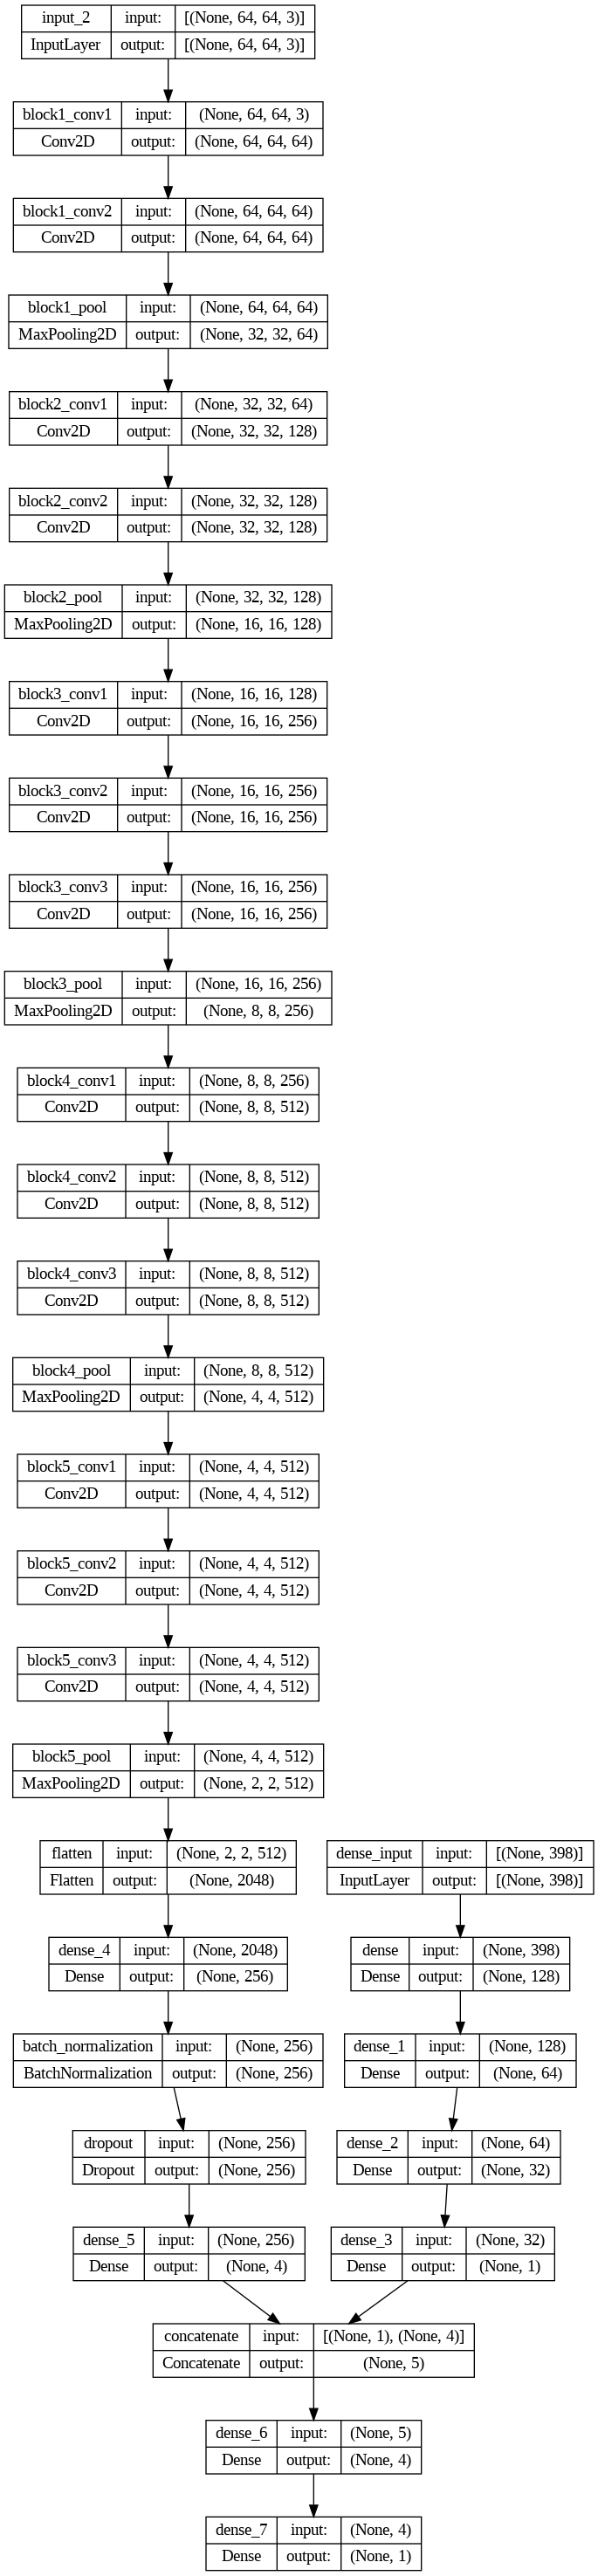

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model2,show_shapes=True)

## Model Training

In [ ]:
%%time
# Define callback untuk menghentikan pelatihan jika val_loss tidak berkurang setelah beberapa epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Define callback untuk mengurangi learning rate jika val_loss tidak berkurang setelah beberapa epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model using training data and validate it using val data
history2 = model2.fit(
    x=[X_train, X2_train],  # Input data for the model (two inputs X_train and X2_train)
    y=y_train,  # Target data (labels)
    validation_data=([X_val, X2_val], y_val),  # Validation data
    epochs=100,  # Number of training epochs
    batch_size=100,  # Batch size for optimization
    callbacks=[early_stopping, reduce_lr]  # List of callbacks to apply during training
)

Epoch 1/100
93/93 [==============================] - 18s 91ms/step - loss: 701637.8125 - val_loss: 704366.6875 - lr: 0.0010
Epoch 2/100
93/93 [==============================] - 5s 54ms/step - loss: 701091.3750 - val_loss: 702235.3125 - lr: 0.0010
Epoch 3/100
93/93 [==============================] - 5s 50ms/step - loss: 691201.4375 - val_loss: 676827.7500 - lr: 0.0010
Epoch 4/100
93/93 [==============================] - 5s 50ms/step - loss: 628017.7500 - val_loss: 553263.7500 - lr: 0.0010
Epoch 5/100
93/93 [==============================] - 5s 50ms/step - loss: 452718.5312 - val_loss: 360801.6562 - lr: 0.0010
Epoch 6/100
93/93 [==============================] - 5s 51ms/step - loss: 299322.8750 - val_loss: 266251.6250 - lr: 0.0010
Epoch 7/100
93/93 [==============================] - 5s 50ms/step - loss: 244615.2188 - val_loss: 242405.2500 - lr: 0.0010
Epoch 8/100
93/93 [==============================] - 5s 50ms/step - loss: 225813.8906 - val_loss: 228791.3906 - lr: 0.0010
Epoch 9/100
93/

Hasil training model 2 dengan improvement memakan waktu yang lebih lama dibandingkan dengan model 1.

## Model Evaluation

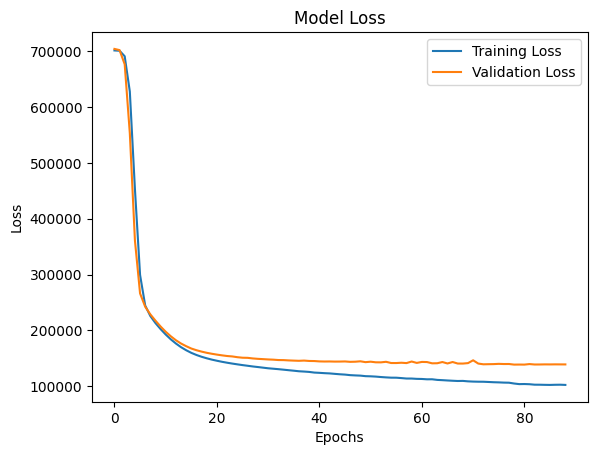

In [ ]:
# Plotting the training and validation loss over epochs
plt.plot(history2.history['loss'], label='Training Loss')  # Plotting training loss
plt.plot(history2.history['val_loss'], label='Validation Loss')  # Plotting validation loss
plt.title('Model Loss')  # Title of the plot
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.legend()  # Display legend
plt.show()  # Show the plot

In [ ]:
# Make predictions using the trained model
predictions2 = model2.predict([X_test, X2_test])

121/121 [==============================] - 4s 22ms/step


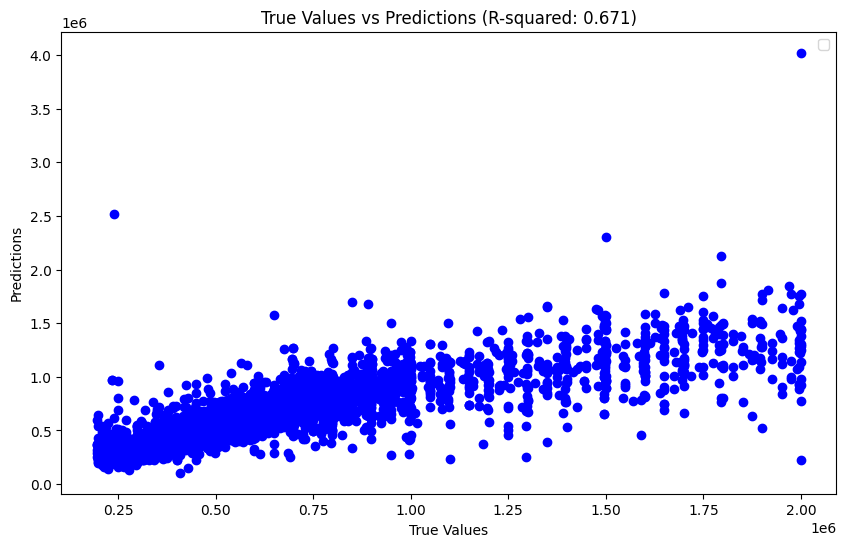

In [ ]:
# Calculate R-squared
r_squared = r2_score(y_test, predictions2)

# Plotting true values vs. predicted values with R-squared in the title
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions2, c='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'True Values vs Predictions (R-squared: {r_squared:.3f})')
plt.legend()
plt.show()

In [ ]:
# Model Evaluation

model_metric2 = model2.evaluate([X_test, X2_test], y_test)
print(f'MAE:\t{model_metric2}')

121/121 [==============================] - 2s 15ms/step - loss: 132435.4062
MAE:	132435.40625


Evaluasi Model 2 ini didapatkan angka:
- R squared = 0.671
- MAE = 132435.40625

Dapat disimpulkan bahwa model 2 hasilnya lebih baik dari model 1. Model 2 dapat menjelaskan 67% variasi dalam data dan rata-rata selisih absolut antara prediksi model dan nilai aktual adalah sekitar 132435.40625.

# viii. Model Saving


Pada tahap ini, kami melakukan saving untuk pipeline, best model (model 2), dan data yang sudah dicleaning.

In [ ]:
# Pipeline model
with open('pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [ ]:
# Saving Best Model
model2.save('model.h5')

In [ ]:
# save dataset
df1.to_csv('house_price.csv', index=False)

# ix. Model Inference

Different Notebook

# x. Kesimpulan

**Kelebihan Model:**
- Model dapat memprediksi melalui image dan feature tabular karena dibuat dari gabungan Model MLP dan CNN.
- Model dibangun dengan pretrained model VGG16 dimana model tersebut memiliki keunggulan dalam pengenalan gambar dan kemampuan generalisasi.
- Penanganan data dengan Feature Engineering (handling outlier, scaling, encoding) menghasilkan data yang clean dan siap dimasukkan ke model.
- Beban komputasi tidak terlalu berat karena ukuran model hanya sebesar 63 MB.

**Keterbatasan Model:**
- Feature street tidak diinput karena kardinalitasnya tinggi dan tidak dapat dihandling meskipun korelasinya sangat tinggi dengan target (price).
- Ketergantungan pada Data California, AS sehingga kurang memprediksi apabila diterapkan pada wilayah geografis lain dengan karakteristik pasar real estate yang berbeda.
- Model yang masih belum dapat memprediksi sebesar 80%.


**Further Improvement:**
- Diharapkan feature yang berkorelasi tinggi seperti `street` juga diinput dalam model.
- Penggunaan feature tambahan seperti tingkat ekonomi, lingkungan sekitar rumah, dan data demografis masyarakat sekitar rumah agar meningkatkan representasi dan kinerja model.
- Mencoba menggunakan pretrained model lain di CNN agar hasil r_squared model lebih tinggi.
- Mengoptimalkan jumlah layer, jumlah neuron, tingkat dropout, dll untuk meningkatkan kinerja model.

**Business Insight:**
- Faktor yang memengaruhi harga rumah terdiri dari:
  - Luas properti terutama pada kategori rumah luxury
  - Jumlah kamar tidur dan kamar mandi, dimana semakin banyak kamar tidur dan kamar mandi cenderung harganya lebih tinggi
  - Lokasi rumah memiliki dampak yang cukup tinggi karena letaknya yang strategis dan fasilitas yang kemungkinan lebih baik
- Sebaran distribusi rumah berdasarkan quartile didapatkan rumah kategori intermediate memiliki frekuensi paling tinggi
- Mayoritas rumah pada semua tier memiliki 2 atau 3 kamar tidur. Namun, rumah luxury cenderung memiliki lebih banyak kamar tidur, dengan mayoritas memiliki 4 kamar tidur.
- Mayoritas rumah pada semua tier memiliki 2 atau 3 kamar mandi. Namun, rumah luxury cenderung memiliki lebih banyak kamar mandi, dengan mayoritas memiliki 3 kamar mandi.
- Kota-kota dengan harga rumah terendah terletak di daerah seperti Oro Grande, Delano, dan Barstow. Ini mungkin menunjukkan adanya peluang investasi potensial bagi pembeli yang ingin memasuki pasar dengan harga terjangkau.
- Di sisi lain, kota-kota dengan harga rumah tertinggi termasuk La Jolla, Venice, dan West Hollywood. Kota-kota ini mungkin menarik bagi pemilik rumah yang mencari properti mewah atau berlokasi di daerah yang bergengsi.
- Dengan pemahaman tersebut, diharapkan dapat membuat keputusan yang lebih terinformasi dan mengurangi ketidakpastian dalam menentukan harga properti.

**Kesimpulan Keseluruhan:**
Dengan platform ini, diharapkan pemilik rumah dapat membuat keputusan yang lebih terinformasi dalam menentukan harga properti mereka. Dengan tingkat akurasi model mencapai 67%, kami berharap dapat mengurangi ketidakpastian dan risiko finansial yang terkait dengan penentuan harga properti di daerah California, Amerika Serikat. Solusi ini tidak hanya memberikan manfaat bagi pemilik rumah, tetapi juga bagi calon pembeli yang mencari properti yang sesuai dengan kebutuhan dan anggaran mereka.